<a href="https://colab.research.google.com/github/diegonz-FC/Entregas-en-Python/blob/main/Aplicaciones_M%C3%A9todo_de_M%C3%ADnimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mínimos Cuadrados**


*   Aproximación.
*   Regresión. (Es la función que modela?)

Buscamos la recta que mejor se ajusta a los datos. Un conjunto de puntos (xi, yi)

Hace la diferencia entre los datos observados y los sintéticos (del modelo) tal que la distancia sea mínima. Busca los parámetros m y b para la recta.

Suma i=1 - n  (Y_p - Y_obs)^2
Y_p = Modelo (Lineal, polinómico, logarítmico)
Y_obs = Datos observados (medidos)
n = número de puntos.

Tendremos:
F(m, b) = Σ(i=1)_n (Y_obs - mx + b)^2

dF/dm = Σ(i=1)_n 2*(Y_i - mx_i + b)(-x_i)
      = Σ(i=1)_n (-2)*(Y_i - mx_i + b)(x_i) = 0

dF/db = Σ(i=1)_n 2*(Y_i - mx_i + b)
      = dF/db = Σ(i=1)_n (-2)*(Y_i - mx_i + b) = 0

Criterio de la primera derivada.

De dF/dm:
-m Σ (x_i)^2 - b Σ x_i = Σ x_i y_i

De dF/db:
-m Σ (x_i)^2 - bn = -Σ y_i
m Σ (x_i)^2 + bn = Σ y_i

Despejamos:
b = (Σy_i - m Σ x_i) / n

m = (n Σ x_i y_i - Σ x_i y_i)  / n Σ x_i - Σ x_i ^2



[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]
La pendiente es:  1.109148825398646
La constante es 0.388736782088678
El error relativo es:  [ 7.99389863  9.85876088  7.75144786  7.96272049 11.77160833  5.78042612
  1.35175154 32.67077002  2.72078503  9.84186574]
La media es:  4.385
La varianza es:  0.35924045734771126
La desviación estándar es:  0.5993667135800179
El coeficiente de variación es:  13.668568154618423
Alta variabilidad


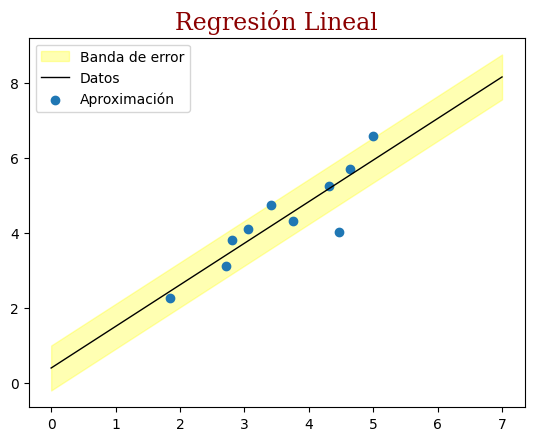

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)


n = len(x)

n = len(x)
m = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x**2) - sum(x)**2)

#return m

#m = pendiente(x, y)
b = (sum(y) - m*sum(x)) / n

i = min(x)
j = max(y)
x1 = np.linspace(0, 7, 100)
y1 = m*x1 + b

print('La pendiente es: ', m)
print('La constante es', b)
font1 = {'family':'serif','color':'darkred','size':17}

ymodel = m*x + b
res = y - ymodel
er =  np.abs(res/y) * 100 # Error relativo
media = np.mean(y)
varianza = np.sum(res**2)/(n-2)
desv = np.sqrt(varianza)
cv = (desv/media) * 100 # Coeficiente de variación

print('El error relativo es: ', er)
print('La media es: ',  media)
print('La varianza es: ',  varianza)
print('La desviación estándar es: ',  desv)
print('El coeficiente de variación es: ', cv)

if cv < 0.5:
  print('Baja variabilidad')
elif cv > 0.5:
  print('Alta variabilidad')

linsup = y1 + desv
lininf = y1 - desv

plt.fill_between(x1, linsup, lininf, color = 'yellow', alpha = 0.3, label = 'Banda de error')
plt.plot(x1, y1, color = 'black', lw = 1, label = 'Datos')
plt.scatter(x, y, label = 'Aproximación')
plt.title('Regresión Lineal', fontdict=font1)
plt.legend()
plt.show()


## Regresión Polinómica
El método proyecta el vector solucion b en el plano A de la matriz de un polinomio de grado n, para que tenga solución y considera el minimo del error residual que es la norma n de todas, entonces es única.
Y r prod.punto v = 0 siempre. Por eso se hace el método en un espacio vectorial con producto interior (Espacio de Gilbert)

At(b-Ax) = 0
At b - At Ax = 0
At Ax = At b
x = (AtA)^-1 At b
Es la proyección

También están el método de diferencias finitas y el de elementos finitos.


El de diferencias finitas genera una malla y evalua en los puntos, la solución es n ecuaciones algebraicas (cada nodo sobre la malla).

El de elementos finitos son mallas no estructuradas (Formas irregulares)

La ecuación es: -3.5282439682829856x^2 + 12.404347928894811x, +-10.935065842229788


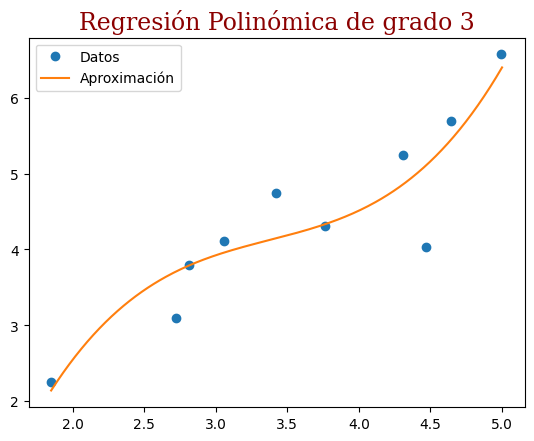

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3, include_bias = True)

x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

c = model.intercept_
a, b = model.coef_[2], model.coef_[1]

print(f'La ecuación es: {a}x^2 + {b}x, +{c}')

x_fit = np.linspace(min(x), 5, 300).reshape(-1,1)
y_fit = poly.transform(x_fit)

yfinal = model.predict(y_fit)

plt.plot(x,y, 'o', label = 'Datos')
plt.plot(x_fit, yfinal, label='Aproximación')
plt.title('Regresión Polinómica de grado 3', fontdict = font1)
plt.legend()

La ecuación es: 1.1491159490857963x^2 + 0.0x, +0.3241375618478699


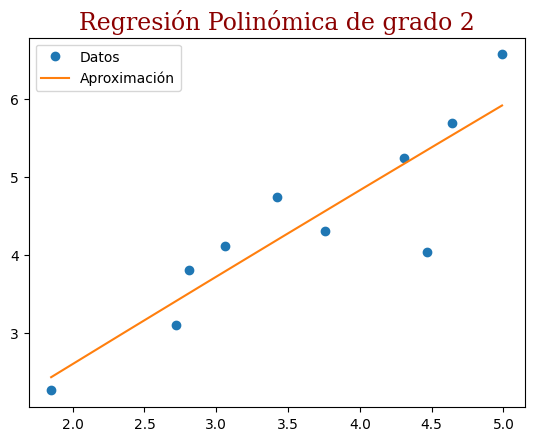

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1) # Para pasarlo a dos dimensiones

poly = PolynomialFeatures(degree = 2, include_bias = True)

x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

c = model.intercept_
a, b = model.coef_[1], model.coef_[0]

print(f'La ecuación es: {a}x^2 + {b}x, +{c}')

x_fit = np.linspace(min(x), max(x), 300)
y_fit = poly.transform(x_fit)

yfinal = model.predict(y_fit)

plt.plot(x,y, 'o', label = 'Datos')
plt.plot(x_fit, yfinal, label='Aproximación')
plt.title('Regresión Polinómica de grado 2', fontdict = font1)
plt.legend()

La ecuación es: -60.46087047353107x^2 + 0.0x, +44.477815007136975


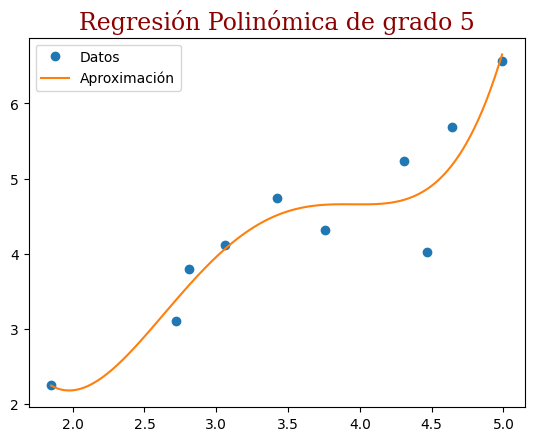

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1) # Para pasarlo a dos dimensiones

poly = PolynomialFeatures(degree = 4, include_bias = True)

x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

c = model.intercept_
a, b = model.coef_[1], model.coef_[0]

print(f'La ecuación es: {a}x^2 + {b}x, +{c}')

x_fit = np.linspace(min(x), max(x), 300)
y_fit = poly.transform(x_fit)

yfinal = model.predict(y_fit)

plt.plot(x,y, 'o', label = 'Datos')
plt.plot(x_fit, yfinal, label='Aproximación')
plt.title('Regresión Polinómica de grado 5', fontdict = font1)
plt.legend()